In [76]:
!pip install pyspark
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('CarSales').getOrCreate()
sales_df = spark.read.csv("/content/data.csv", header=True, inferSchema=True)
sales_df.printSchema()

root
 |-- Make: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Engine Fuel Type: string (nullable = true)
 |-- Engine HP: integer (nullable = true)
 |-- Engine Cylinders: integer (nullable = true)
 |-- Transmission Type: string (nullable = true)
 |-- Driven_Wheels: string (nullable = true)
 |-- Number of Doors: integer (nullable = true)
 |-- Market Category: string (nullable = true)
 |-- Vehicle Size: string (nullable = true)
 |-- Vehicle Style: string (nullable = true)
 |-- highway MPG: integer (nullable = true)
 |-- city mpg: integer (nullable = true)
 |-- Popularity: integer (nullable = true)
 |-- MSRP: integer (nullable = true)



In [77]:
sales_df.na.drop(how="any").show(truncate=False)

+----+----------+----+---------------------------+---------+----------------+-----------------+-----------------+---------------+-------------------------------------+------------+-------------+-----------+--------+----------+-----+
|Make|Model     |Year|Engine Fuel Type           |Engine HP|Engine Cylinders|Transmission Type|Driven_Wheels    |Number of Doors|Market Category                      |Vehicle Size|Vehicle Style|highway MPG|city mpg|Popularity|MSRP |
+----+----------+----+---------------------------+---------+----------------+-----------------+-----------------+---------------+-------------------------------------+------------+-------------+-----------+--------+----------+-----+
|BMW |1 Series M|2011|premium unleaded (required)|335      |6               |MANUAL           |rear wheel drive |2              |Factory Tuner,Luxury,High-Performance|Compact     |Coupe        |26         |19      |3916      |46135|
|BMW |1 Series  |2011|premium unleaded (required)|300      |6       

In [78]:
sales_df.columns
df = sales_df.toPandas()
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [79]:

df=df.dropna()
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

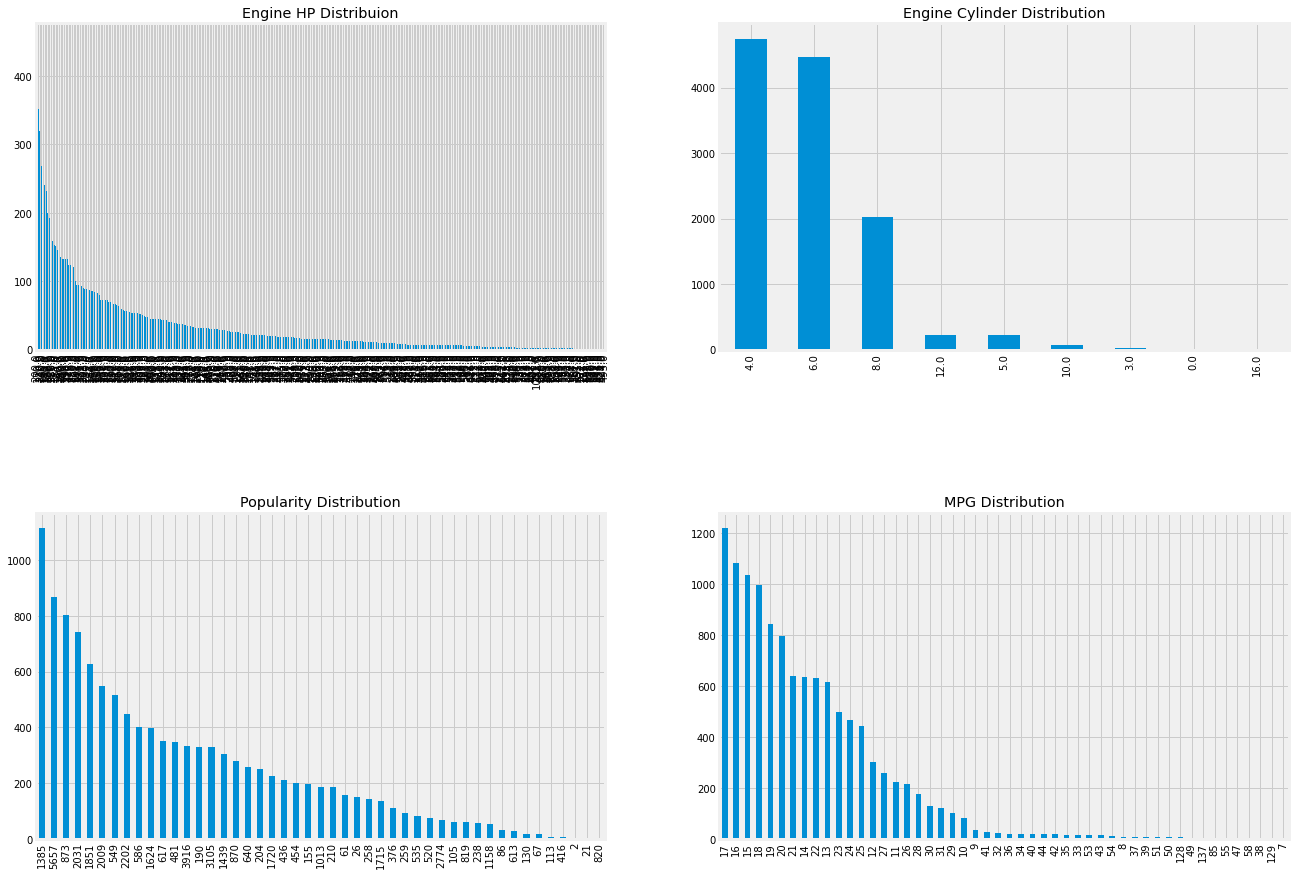

In [80]:
#Visualizing distribution of categorical variables
f,ax=plt.subplots(2,2,figsize=(20,15))
df['Engine HP'].value_counts().plot.bar(ax=ax[0,0])
ax[0,0].set_title('Engine HP Distribuion')
df['Engine Cylinders'].value_counts().plot.bar(ax=ax[0,1])
ax[0,1].set_title('Engine Cylinder Distribution')
df['Popularity'].value_counts().plot.bar(ax=ax[1,0])
ax[1,0].set_title('Popularity Distribution')
df['city mpg'].value_counts().plot.bar(ax=ax[1,1])
ax[1,1].set_title('MPG Distribution')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

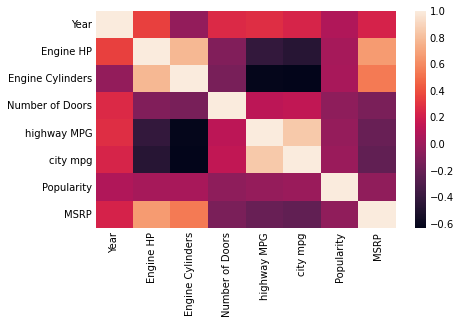

In [81]:
df.corr()
sns.heatmap(df.corr())

In [82]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,1.181200e+04
mean,2010.361581,249.504487,5.649424,3.432526,26.320945,19.328141,1553.679902,4.055994e+04
std,7.594647,109.206947,1.751646,0.882919,7.443589,6.527734,1440.067820,6.028413e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.099000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.997000e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.220500e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


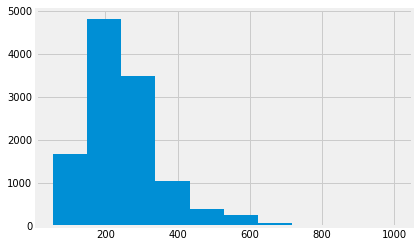

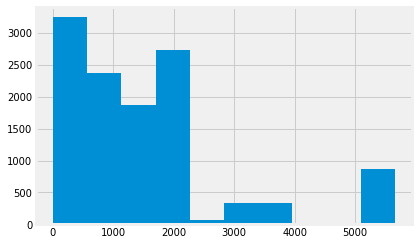

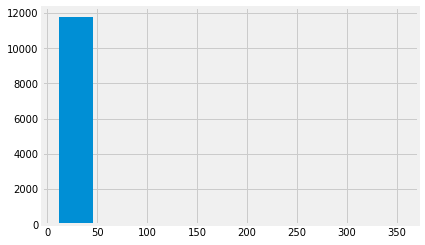

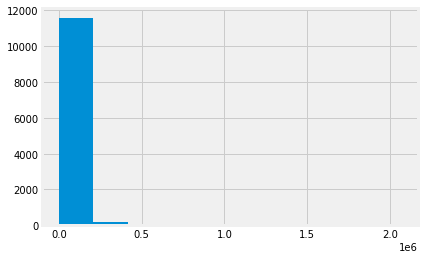

In [83]:
plt.hist(df['Engine HP'])
plt.show()
plt.hist(df['Popularity'])
plt.show()
plt.hist(df['highway MPG'])
plt.show()
plt.hist(df['MSRP'])
plt.show()

In [84]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

assembler = VectorAssembler(inputCols=['Engine HP', 'Engine Cylinders', 'city mpg', 'Popularity'], outputCol = 'Attributes')

output = assembler.transform(sales_df)

finalized_data = output.select("Attributes","MSRP")

finalized_data.show()

+--------------------+-----+
|          Attributes| MSRP|
+--------------------+-----+
|[335.0,6.0,19.0,3...|46135|
|[300.0,6.0,19.0,3...|40650|
|[300.0,6.0,20.0,3...|36350|
|[230.0,6.0,18.0,3...|29450|
|[230.0,6.0,18.0,3...|34500|
|[230.0,6.0,18.0,3...|31200|
|[300.0,6.0,17.0,3...|44100|
|[300.0,6.0,20.0,3...|39300|
|[230.0,6.0,18.0,3...|36900|
|[230.0,6.0,18.0,3...|37200|
|[300.0,6.0,20.0,3...|39600|
|[230.0,6.0,19.0,3...|31500|
|[300.0,6.0,19.0,3...|44400|
|[230.0,6.0,19.0,3...|37200|
|[230.0,6.0,19.0,3...|31500|
|[320.0,6.0,18.0,3...|48250|
|[320.0,6.0,20.0,3...|43550|
|[172.0,6.0,17.0,3...| 2000|
|[172.0,6.0,17.0,3...| 2000|
|[172.0,6.0,16.0,3...| 2000|
+--------------------+-----+
only showing top 20 rows



In [85]:
train_data,test_data = finalized_data.randomSplit([0.8,0.2])
lr = LinearRegression(featuresCol = 'Attributes', labelCol='MSRP', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_data)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Py4JJavaError: ignored